#####  Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


In [29]:
import pandas as pd
# Make a copy of the date column to inspect not date  values

import sys
from src import load_csv_finantial_news_data
sys.path.append("../../src")

data_path = '../../data/news/raw_analyst_ratings.csv'
stock_news = load_csv_finantial_news_data(data_path)


original_dates = stock_news['date'].copy()
# Attempt conversion, turning errors into NaT (Not a Time)
stock_news['date_dt'] = pd.to_datetime(stock_news['date'], errors='coerce')

# Find rows where conversion failed (date_dt is NaT) but the original value was not null
problematic_entries = stock_news[stock_news['date_dt'].isnull() & original_dates.notnull()]


if not problematic_entries.empty:
    print(f"Found {len(problematic_entries)} entries that could not be converted to datetime.")
    print("Here are some of the problematic original 'date' values:")
    # Show a sample of the original problematic values
    print(problematic_entries[['date']].head(50))

    print("\nValue counts of the most common problematic date strings:")
    print(problematic_entries['date'].value_counts().head(50))

stock_news['date'] = pd.to_datetime(stock_news['date'])  # Convert to datetime if not already
stock_news['date_only'] = stock_news['date'].dt.tz_convert('US/Eastern').dt.date  # Date without time
stock_news['weekday'] = stock_news['date'].dt.tz_convert('US/Eastern').dt.weekday  # Monday=0, Sunday=6
stock_news['hour'] = stock_news['date'].dt.tz_convert('US/Eastern').dt.hour  # Hour of day


Found 1351341 entries that could not be converted to datetime.
Here are some of the problematic original 'date' values:
                   date
10  2020-05-22 00:00:00
11  2020-05-22 00:00:00
12  2020-05-21 00:00:00
13  2020-05-21 00:00:00
14  2020-05-21 00:00:00
15  2020-05-21 00:00:00
16  2020-05-18 00:00:00
17  2020-05-16 00:00:00
18  2020-05-15 00:00:00
19  2020-05-08 00:00:00
20  2020-05-05 00:00:00
21  2020-05-01 00:00:00
22  2020-04-28 00:00:00
23  2020-04-23 00:00:00
24  2020-04-22 00:00:00
25  2020-04-14 00:00:00
26  2020-04-08 00:00:00
27  2020-04-06 00:00:00
28  2020-04-02 00:00:00
29  2020-04-01 00:00:00
30  2020-03-31 00:00:00
31  2020-03-30 00:00:00
32  2020-03-30 00:00:00
33  2020-03-27 00:00:00
34  2020-03-26 00:00:00
35  2020-03-26 00:00:00
36  2020-03-26 00:00:00
37  2020-03-20 00:00:00
38  2020-03-16 00:00:00
39  2020-03-16 00:00:00
40  2020-03-13 00:00:00
41  2020-03-12 00:00:00
42  2020-03-11 00:00:00
43  2020-03-03 00:00:00
44  2020-03-02 00:00:00
45  2020-02-24 0

ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [26]:



# Using errors='coerce' will turn any truly unparseable strings into NaT (Not a Time)
stock_news['date_utc'] = pd.to_datetime(stock_news['date'], utc=True, errors='coerce')

print("\nConverted 'date_utc' column sample (first 5):")
print(stock_news[['date', 'date_utc']].head())

# Now, check if any of the original strings failed to convert even with utc=True and errors='coerce'
# This would indicate strings that are not recognizable as dates at all.
failed_conversions = stock_news[stock_news['date_utc'].isnull() & stock_news['date'].notnull()]

if not failed_conversions.empty:
    print(f"\nFound {len(failed_conversions)} entries that STILL could not be parsed into dates even with utc=True:")
    print("Sample of these truly problematic original 'date' values:")
    print(failed_conversions[['date']].head(10))
    print("\nValue counts of these truly problematic strings:")
    print(failed_conversions['date'].value_counts().head(50))



if 'date_utc' in stock_news.columns and stock_news['date_utc'].notna().any():
    stock_news['date_only'] = stock_news['date_utc'].dt.date
    stock_news['weekday'] = stock_news['date_utc'].dt.day_name()
    stock_news['hour'] = stock_news['date_utc'].dt.hour

    print("\nDataFrame with new temporal columns (from UTC dates):")
    print(stock_news[['date', 'date_utc', 'date_only', 'weekday', 'hour']].head())

    # Your temporal analysis:
    articles_per_day = stock_news.groupby('date_only').size()
    articles_per_weekday = stock_news.groupby('weekday').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).fillna(0)
    articles_per_hour = stock_news.groupby('hour').size()

    print("\nArticles per day (UTC dates):")
    print(articles_per_day.head())
    print("\nArticles per weekday (UTC dates):")
    print(articles_per_weekday.head())
    print("\nArticles per hour (UTC hours):")
    print(articles_per_hour.head())



Converted 'date_utc' column sample (first 5):
                        date                  date_utc
0  2020-06-05 10:30:54-04:00 2020-06-05 14:30:54+00:00
1  2020-06-03 10:45:20-04:00 2020-06-03 14:45:20+00:00
2  2020-05-26 04:30:07-04:00 2020-05-26 08:30:07+00:00
3  2020-05-22 12:45:06-04:00 2020-05-22 16:45:06+00:00
4  2020-05-22 11:38:59-04:00 2020-05-22 15:38:59+00:00

Found 1351341 entries that STILL could not be parsed into dates even with utc=True:
Sample of these truly problematic original 'date' values:
                   date
10  2020-05-22 00:00:00
11  2020-05-22 00:00:00
12  2020-05-21 00:00:00
13  2020-05-21 00:00:00
14  2020-05-21 00:00:00
15  2020-05-21 00:00:00
16  2020-05-18 00:00:00
17  2020-05-16 00:00:00
18  2020-05-15 00:00:00
19  2020-05-08 00:00:00

Value counts of these truly problematic strings:
date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00  

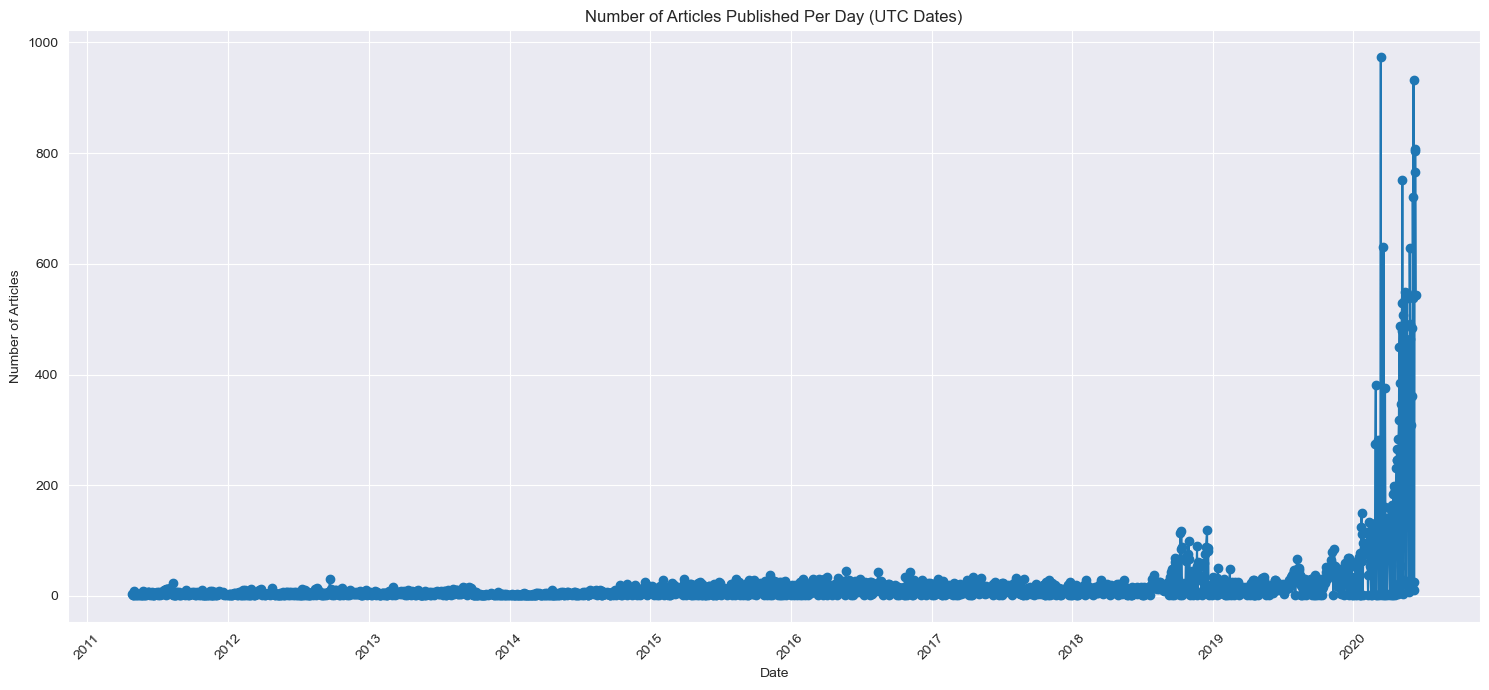

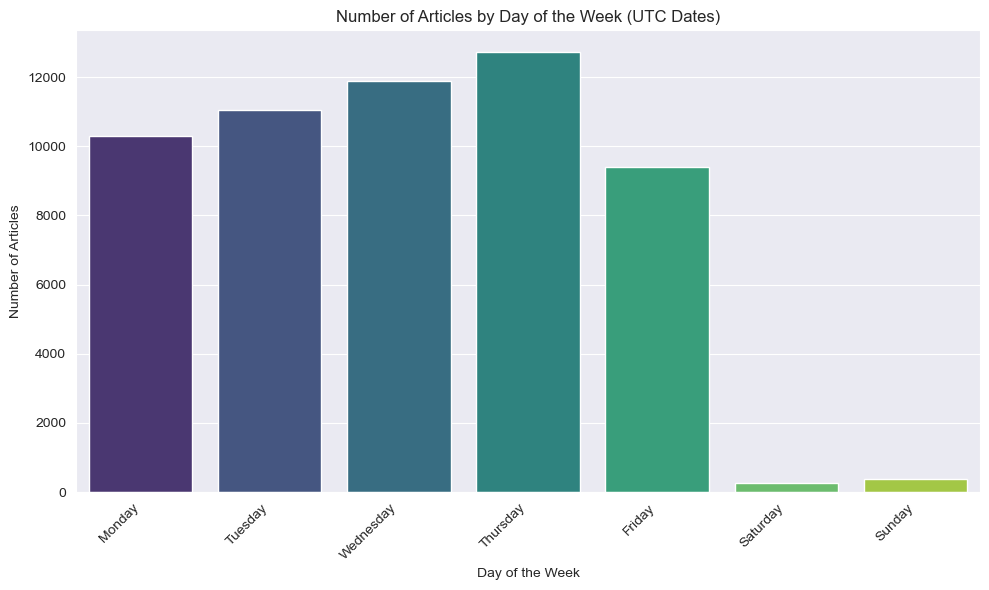

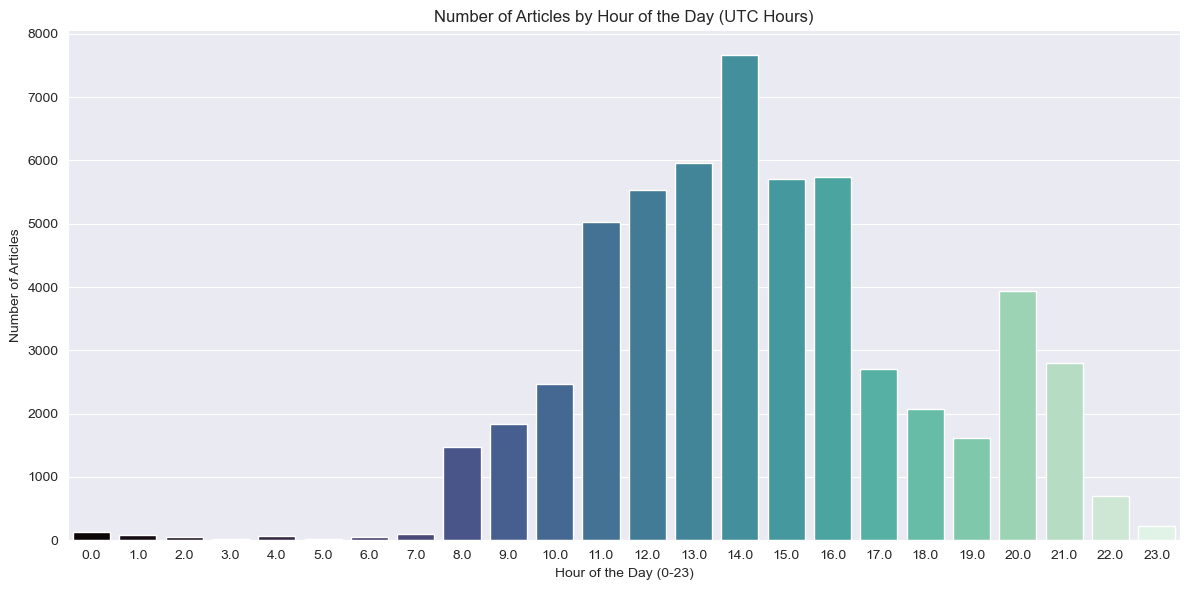

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot articles per day
if 'articles_per_day' in locals() and not articles_per_day.empty:
    plt.figure(figsize=(15, 7))
    articles_per_day.sort_index().plot(kind='line', marker='o', linestyle='-')
    plt.title('Number of Articles Published Per Day (UTC Dates)')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("articles_per_day is not available or is empty. Skipping plot.")

# Plot articles per weekday
if 'articles_per_weekday' in locals() and not articles_per_weekday.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=articles_per_weekday.index, y=articles_per_weekday.values, hue=articles_per_weekday.index, palette="viridis", legend=False)
    plt.title('Number of Articles by Day of the Week (UTC Dates)')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("articles_per_weekday is not available or is empty. Skipping plot.")

# Plot articles per hour
if 'articles_per_hour' in locals() and not articles_per_hour.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=articles_per_hour.index, y=articles_per_hour.values, hue=articles_per_hour.index, palette="mako", legend=False)
    plt.title('Number of Articles by Hour of the Day (UTC Hours)')
    plt.xlabel('Hour of the Day (0-23)')
    plt.ylabel('Number of Articles')
    plt.tight_layout()
    plt.show()
else:
    print("articles_per_hour is not available or is empty. Skipping plot.")